In [14]:
import pandas as pd
import numpy as np
import glob
import os
import re

In [15]:
file_paths = glob.glob('*.xvg')
file_paths

['md9.xvg',
 'md2.xvg',
 'md5.xvg',
 'md6.xvg',
 'md4.xvg',
 'md10.xvg',
 'md1.xvg',
 'md3.xvg',
 'md8.xvg',
 'md7.xvg']

In [16]:
if not os.path.isdir('clean'):
    os.mkdir('clean')

In [17]:

for i in range(1,11):
    file_name = f'md{i}.xvg'
    if not os.path.isfile(file_name):
        print(f'{file_name} does not exist')
        continue
    with open(f'{file_name}', 'r+') as file, open(f'clean/{file_name}', 'w') as clean_file:
        lines = file.readlines()
        for line in lines[61:]:
            clean_file.write(f'{line}')

In [18]:
clean_files = glob.glob('clean/*.xvg')
clean_files.sort(key=lambda f: int(re.findall(r'\d+', f)[0]))
clean_files

['clean/md1.xvg',
 'clean/md2.xvg',
 'clean/md3.xvg',
 'clean/md4.xvg',
 'clean/md5.xvg',
 'clean/md6.xvg',
 'clean/md7.xvg',
 'clean/md8.xvg',
 'clean/md9.xvg',
 'clean/md10.xvg']

In [19]:
# rm text line
for clean_file in clean_files:
    with open(clean_file, 'r+') as f:
        d = f.readlines()
        f.seek(0)
        for i in d:
            if '#' not in i :
                f.write(i)
        f.truncate()
            


In [20]:
frames = []
start_time = 0.2
for idx, clean_file in enumerate(clean_files):
    df = pd.read_csv(clean_file, sep='\s+',header=None)
    row_nb = len(df.index)
    print(row_nb)
    stop_time = row_nb * 0.2 + start_time - 0.2
    
    df['time_1'] = pd.Series(np.arange(start_time, stop_time, 0.2)) #starts with 0.2
    frames.append(df)
    start_time = stop_time + 0.4
results = pd.concat(frames).reset_index()

4999
4999
4999
4999
4999
4999
4999
4999
4999
4999


In [21]:
df_output = results[['time_1', 16]]

In [22]:
results

,index,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,time_1
0,0,0.2,108,10.0,0,88,0.0,0,108,-10.0,...,0.0,0,16.6684,5.68203,0,0,0,0,0,0.2
1,1,0.4,98,0.0,-10,88,0.0,0,118,0.0,...,0.0,0,16.6676,5.68175,0,0,0,0,0,0.4
2,2,0.6,98,0.0,-10,88,0.0,0,118,0.0,...,0.0,0,16.6673,5.68232,0,0,0,0,0,0.6
3,3,0.8,98,0.0,-10,88,0.0,0,118,0.0,...,0.0,0,16.6677,5.68080,0,0,0,0,0,0.8
4,4,1.0,98,0.0,-10,88,0.0,0,118,0.0,...,0.0,0,16.6683,5.68161,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,4994,999.0,98,0.0,-1,88,0.0,2,118,0.0,...,0.0,-2,16.7141,5.88631,0,0,0,0,319,9999.0
49986,4995,999.2,98,0.0,-1,88,0.0,2,118,0.0,...,0.0,-2,16.7171,5.88441,0,0,0,0,319,9999.2
49987,4996,999.4,98,0.0,-1,88,0.0,2,118,0.0,...,0.0,-2,16.7198,5.88466,0,0,0,0,319,9999.4
49988,4997,999.6,98,0.0,-1,88,0.0,2,118,0.0,...,0.0,-2,16.7202,5.88493,0,0,0,0,319,9999.6


In [23]:
df_output.columns = ['time_1', 'data']

In [24]:
df_output.to_csv('test.csv', index=None)

In [25]:
count = 0
for i in range(len(df_output)-1):
    data = abs(df_output.loc[i, "data"])
    next_data = abs(df_output.loc[i+1, "data"])
    if data != next_data and data == 0:
        count +=1
        

In [26]:
count

2

In [55]:
df_in = pd.read_csv('test.csv')

In [56]:
df_in

,time_1,data
0,0.2,0
1,0.4,0
2,0.6,0
3,0.8,0
4,1.0,0
...,...,...
49985,9999.0,0
49986,9999.2,0
49987,9999.4,0
49988,9999.6,0


In [60]:
df_in['data_1'] = 0

In [61]:
df_in

,time_1,data,data_1
0,0.2,0,0
1,0.4,0,0
2,0.6,0,0
3,0.8,0,0
4,1.0,0,0
...,...,...,...
49985,9999.0,0,0
49986,9999.2,0,0
49987,9999.4,0,0
49988,9999.6,0,0


In [64]:
count = 0
print(len(df_in))
for i in range(1, len(df_in)):
    data = abs(df_in.loc[i, "data"])
    prev_data = abs(df_in.loc[i-1, "data"])
    if data != prev_data:
        count += 1
        print(count)
    df_in.loc[i, 'data_1'] = count

49990
1
2
3
4


In [78]:
del df_in['data']

In [79]:
df_in.to_csv('df_in.xvg', index=False)

In [74]:
import matplotlib.pyplot as plt
df = pd.read_csv('df_in.csv')

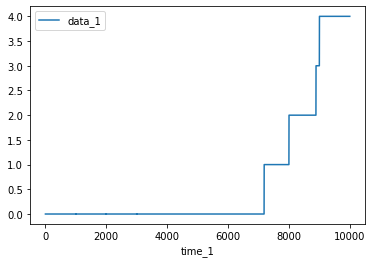

In [75]:
df.plot(kind = 'line', x = 'time_1', y = 'data_1')

plt.show()